In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Varying Production Rate**

In [2]:
rates_df = pd.read_excel('../data/Injection - Production Rates Data - clean.xlsx', sheet_name='Sheet1')
rates_df.dropna(inplace=True)

rate_time_points = rates_df['Time, min'].to_numpy()
rate_rate_points = rates_df['Production Rate, bpm'].to_numpy()

nds_df = pd.read_excel('../data/rose_tracers.xlsx', sheet_name='NDS')
nds_time_points = nds_df['Time, hr'].to_numpy() * 60
nds_concentration_points = nds_df['Normalized Concentration, mg/L'].to_numpy()


interpolated_rates = np.interp(
    nds_time_points,
    rate_time_points,
    rate_rate_points,
    left=rate_rate_points[0],
    right=rate_rate_points[-1]
)

nds_residence_time = nds_concentration_points * interpolated_rates * 42 * 3.78 / 1e6

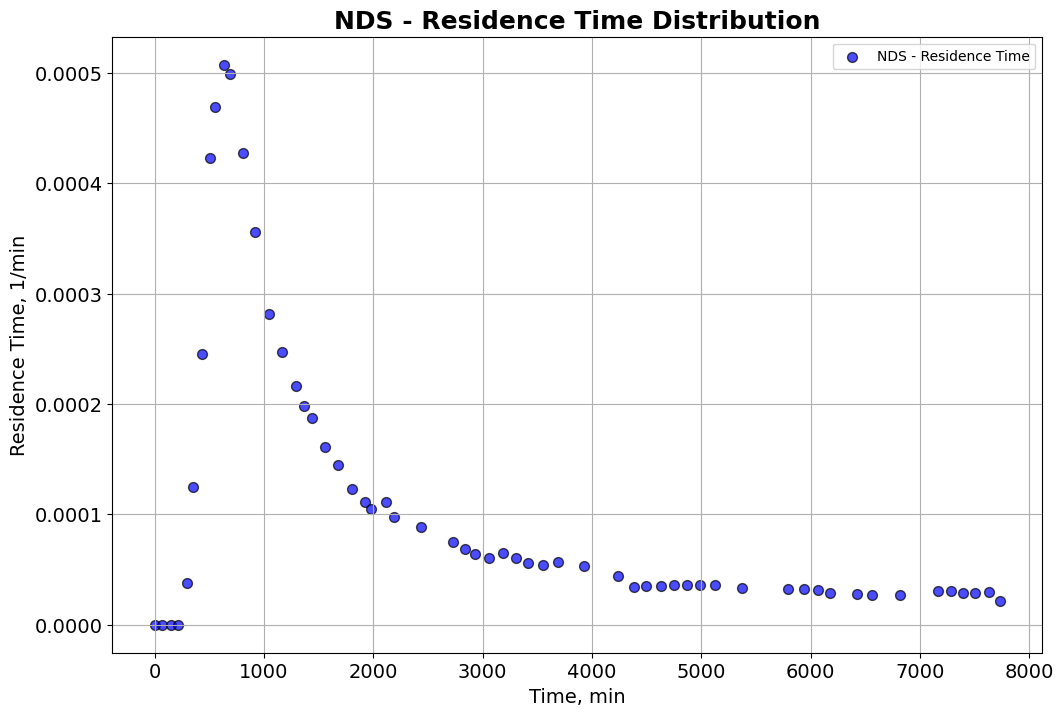

In [3]:
plt.figure(figsize=(12, 8))

plt.scatter(nds_time_points, nds_residence_time, color='blue', edgecolor='black', alpha=0.7, s=50, label="NDS - Residence Time")

plt.title("NDS - Residence Time Distribution", fontsize=18, fontweight='bold')
plt.xlabel('Time, min', fontsize=14)
plt.ylabel('Residence Time, 1/min', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
plt.grid(True)
plt.show()

### Recovery Factor

In [4]:
from scipy.integrate import quad

recovery_factor, _ = quad(lambda t: np.interp(t, nds_time_points, nds_residence_time),
                            nds_time_points[0],
                            nds_time_points[-1])



/tmp/ipykernel_13936/4239152743.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  recovery_factor, _ = quad(lambda t: np.interp(t, nds_time_points, nds_residence_time),


In [5]:
print(f'Recovery Factor: {recovery_factor}')

Recovery Factor: 0.7052331162019987


### Modal Volume

In [6]:
residence_volume = nds_residence_time / interpolated_rates
volume_points = nds_time_points * interpolated_rates

In [7]:
modal_volume = volume_points[np.argmax(residence_volume)]
print(f'Modal Volume: {modal_volume} bbl')

Modal Volume: 4649.271885656239 bbl


### Mean Residence Time

In [8]:
### Mean Integral Volume
mean_residence_time, _ = quad(lambda t: np.interp(t, nds_time_points, nds_residence_time * nds_time_points),
                            nds_time_points[0],
                            nds_time_points[-1])

mean_residence_time = mean_residence_time / recovery_factor

/tmp/ipykernel_13936/2299419476.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  mean_residence_time, _ = quad(lambda t: np.interp(t, nds_time_points, nds_residence_time * nds_time_points),


In [9]:
print(f'Mean Residence Time: {mean_residence_time/60} hr')

Mean Residence Time: 36.31086974512035 hr


### Pore Volume

In [10]:
pore_volume, _ = quad(lambda t: np.interp(t, nds_time_points, nds_residence_time * nds_time_points * interpolated_rates),
                            nds_time_points[0],
                            nds_time_points[-1])

/tmp/ipykernel_13936/2972174849.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  pore_volume, _ = quad(lambda t: np.interp(t, nds_time_points, nds_residence_time * nds_time_points * interpolated_rates),


In [11]:
print(f'Pore Volume: {pore_volume * recovery_factor} bbl')

Pore Volume: 8319.199082124362 bbl
